# Final Project - Salary Prediction - Stack Overflow Developer Survey 2023

College: `CCT College Dublin`

Module Title: `Problem-Solving for Industry`

Lecturer Name: `Dr. Muhammad Iqbal`

Student Full Name: `Marcos Vinicius de Oliveira | Mario Luis Saldanha Santos`

Students Number: `2023323 | 2023410`

Assessment Due Date: `May 17th, 2024`

Date of Submission: ``

# Overview:

## Introduction

The dynamic and global field of IT is growing daily with such a variety of new job opportunities that can become easily overwhelming to both IT professionals and companies alike. Therefore, Professionals and companies are always seeking to improve their services. To make it easy, this is where the application comes in, helping them to predict the salary of IT professionals or other sectors.
This machine-learning web application model will be built from scratch, and it aims to solve a real-world problem. For this project, we will be using the latest public 2023 stack overflow developer survey. 
In May 2023 over 90,000 developers responded to our annual survey about how they learn and level up, which tools they're using, and which ones they want. (Stack Overflow, 2023)

## 1. Exploratory Data Analysis EDA

### 1.1 Importing Libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1.2 Loading the csv file

In [17]:
df = pd.read_csv("survey_results_public_2023.csv")
df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


### 1.3 Checking Mean, Min and Max

In [18]:
df.describe()

,ResponseId,CompTotal,WorkExp,ConvertedCompYearly
count,89184.000000,4.822500e+04,43579.000000,4.801900e+04
mean,44592.500000,1.036807e+42,11.405126,1.031101e+05
std,25745.347541,2.276847e+44,9.051989,6.814188e+05
min,1.000000,0.000000e+00,0.000000,1.000000e+00
25%,22296.750000,6.300000e+04,5.000000,4.390700e+04
50%,44592.500000,1.150000e+05,9.000000,7.496300e+04
75%,66888.250000,2.300000e+05,16.000000,1.216410e+05
max,89184.000000,5.000000e+46,50.000000,7.435143e+07


### 1.4 Columns Names

In [19]:
df.columns

Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWan

### 1.5 Columns and Rows

In [20]:
df.shape

(89184, 84)

## 2. Feature Engineering

### 2.1 Renaming Salary

Renaming `ConvertedCompYearly` to `Salary`.

In [21]:
df = df.rename({"ConvertedCompYearly": "Salary"}, axis=1)
df = df[df["Salary"].notnull()]
df.isna().sum().sort_values(ascending=False)

AINextVery similar                     46571
AINextNeither different nor similar    44685
AINextSomewhat similar                 44639
AINextVery different                   41681
AIDevWantToWorkWith                    37357
                                       ...  
ResponseId                                 0
Currency                                   0
CompTotal                                  0
Country                                    0
Salary                                     0
Length: 84, dtype: int64

### 2.2 New Dataframe

We chose to work with `Country`, `Age`, `EdLevel`, `YearsCodePro`, `Employment`, `RemoteWork` and `Salary` columns.

> OBS: Salary = Dependent Variable; Where as Country, Age, EdLevel, YearsCodePro and Employment = Independent Variable;

In [22]:
df = df[["Country", "Age", "EdLevel", "YearsCodePro", "Employment", "RemoteWork", "Salary"]]
df.head()

,Country,Age,EdLevel,YearsCodePro,Employment,RemoteWork,Salary
1,United States of America,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,"Employed, full-time",Remote,285000.0
2,United States of America,45-54 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,"Employed, full-time","Hybrid (some remote, some in-person)",250000.0
3,United States of America,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,"Employed, full-time","Hybrid (some remote, some in-person)",156000.0
4,Philippines,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,"Employed, full-time;Independent contractor, fr...",Remote,23456.0
5,United Kingdom of Great Britain and Northern I...,35-44 years old,Some college/university study without earning ...,21,"Employed, full-time",Remote,96828.0


### 2.3 Data Type

Checking the data type of each column

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48019 entries, 1 to 89171
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       48019 non-null  object 
 1   Age           48019 non-null  object 
 2   EdLevel       48019 non-null  object 
 3   YearsCodePro  47825 non-null  object 
 4   Employment    48007 non-null  object 
 5   RemoteWork    47940 non-null  object 
 6   Salary        48019 non-null  float64
dtypes: float64(1), object(6)
memory usage: 2.9+ MB


### 2.4 Missing Values

In [24]:
df.isna().sum()

Country           0
Age               0
EdLevel           0
YearsCodePro    194
Employment       12
RemoteWork       79
Salary            0
dtype: int64

### 2.5 Dropping Null Values

Since we have enough data, we prefer to drop the rows with null values just for simplicity

In [25]:
df=df.dropna()
df.isna().sum()

Country         0
Age             0
EdLevel         0
YearsCodePro    0
Employment      0
RemoteWork      0
Salary          0
dtype: int64

### 2.6 Full-Time Employed

In [26]:
df = df[df["Employment"]=="Employed, full-time"]
df = df.drop("Employment",axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39155 entries, 1 to 89171
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       39155 non-null  object 
 1   Age           39155 non-null  object 
 2   EdLevel       39155 non-null  object 
 3   YearsCodePro  39155 non-null  object 
 4   RemoteWork    39155 non-null  object 
 5   Salary        39155 non-null  float64
dtypes: float64(1), object(5)
memory usage: 2.1+ MB


### 2.7 Plotting

#### 2.7.1 Showing Age

Grouping the responses with the age group and displaying it

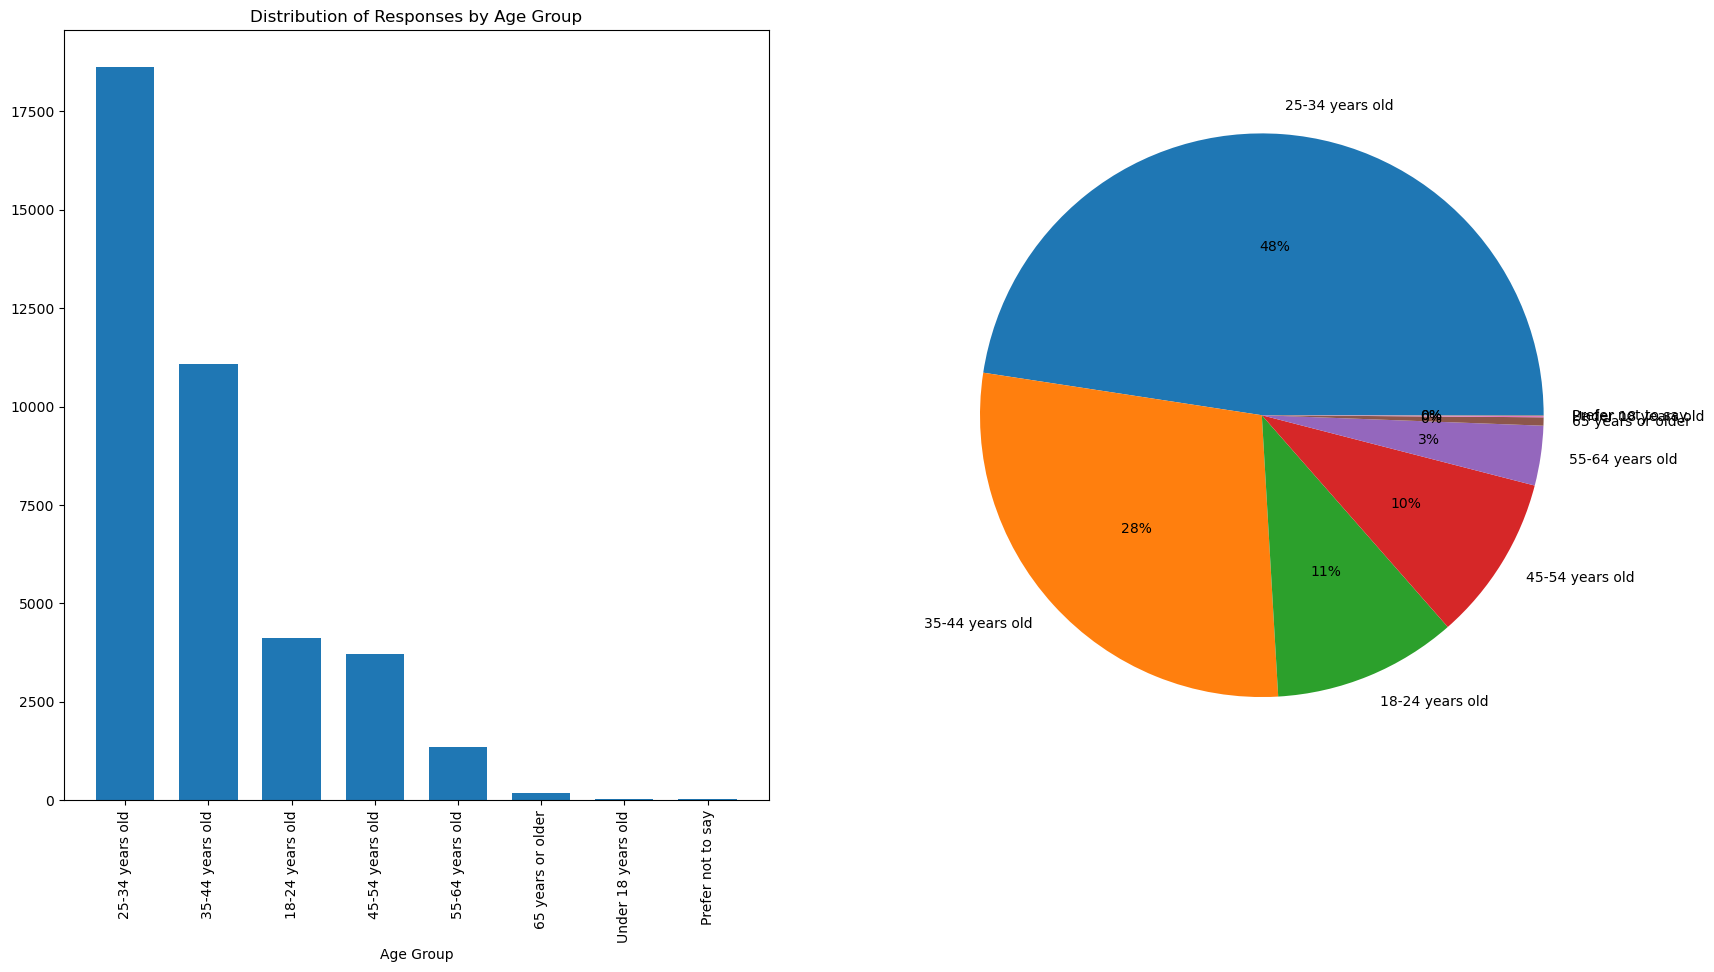

In [27]:
age = df["Age"].value_counts()

label = age.index
value = age.values

plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)
plt.bar(label, value, width=0.7)
plt.xticks(rotation=90)
plt.title('Distribution of Responses by Age Group')
plt.xlabel('Age Group')

plt.subplot(1,2,2)
plt.pie(x=value, labels=label, autopct='%.0f%%')

plt.show()

#### 2.7.2 Education Group

Grouping the responses by the education group and displaying it

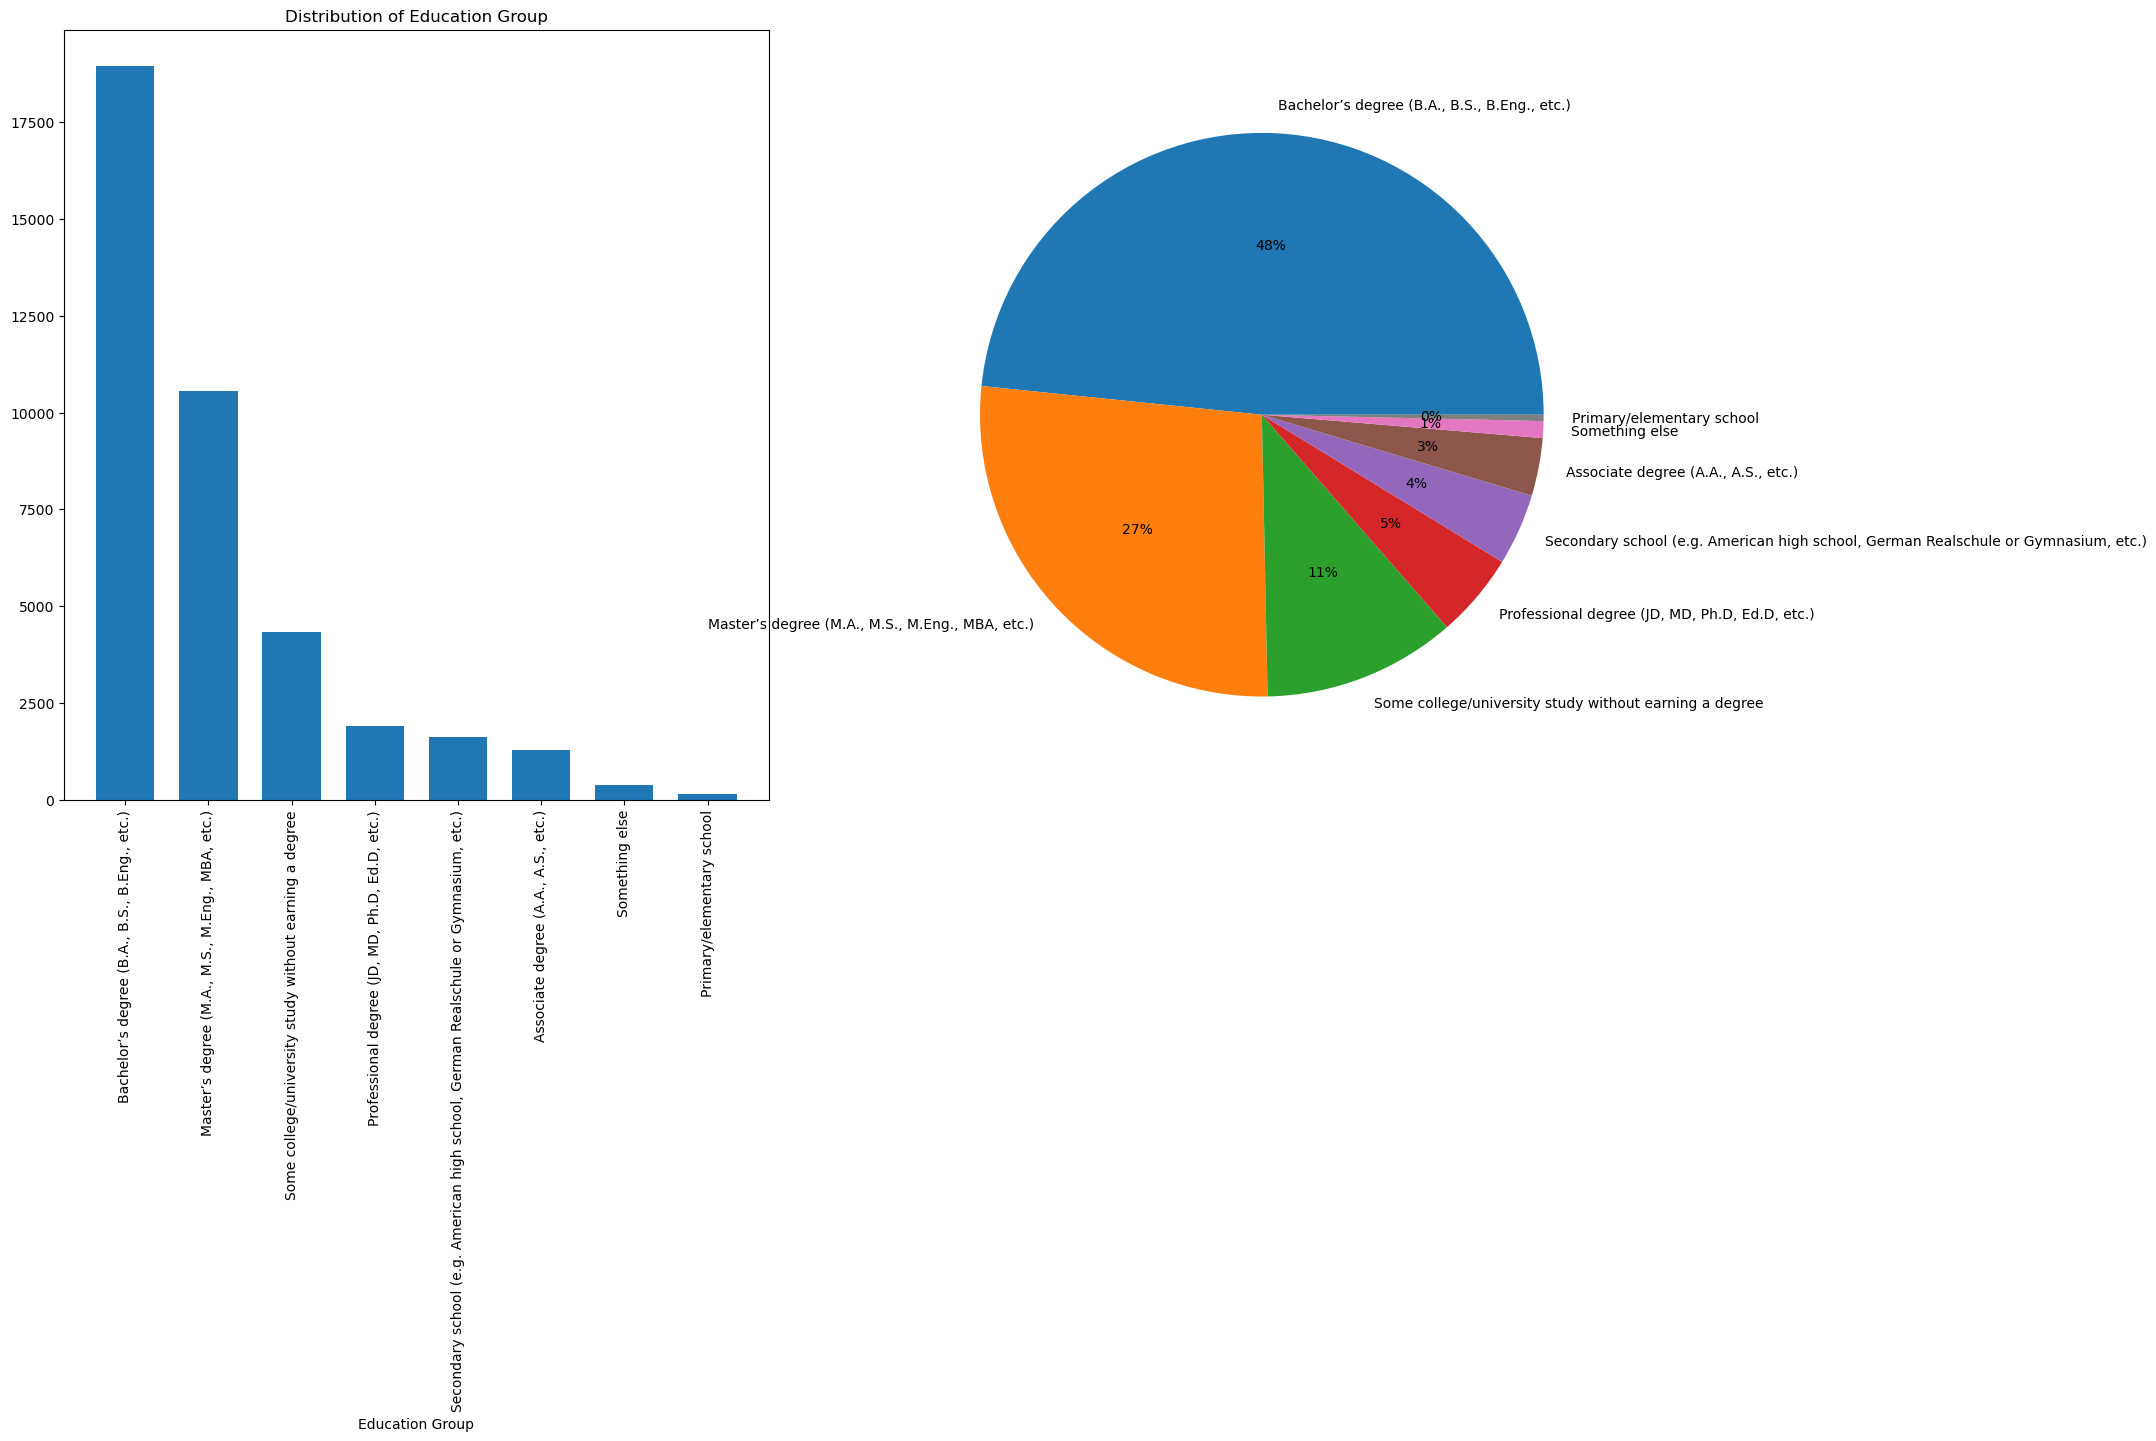

In [28]:
ed = df["EdLevel"].value_counts()

label = ed.index
value = ed.values

plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)
plt.title('Distribution of Education Group')
plt.xlabel('Education Group')
plt.bar(label, value, width=0.7)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.pie(x=value, labels=label, autopct='%.0f%%')
plt.show()

#### 2.7.3 Country Group

This function adds those countries with less than 400 entries into a `Other` category.

In [29]:
def shorten_categories(categories,cutoff):
    categories_map = {}
    for i in range(len(categories)):
        if categories.values[i]>=cutoff:
            categories_map[categories.index[i]] = categories.index[i]
        else:
            categories_map[categories.index[i]] = 'Other'
    return categories_map

In [30]:
country_map = shorten_categories(df["Country"].value_counts(), 200)

df["Country"] = df["Country"].map(country_map)
df["Country"].value_counts()

Country
United States of America                                10569
Other                                                    4502
Germany                                                  3201
United Kingdom of Great Britain and Northern Ireland     3072
Canada                                                   1807
India                                                    1600
France                                                   1458
Netherlands                                              1002
Australia                                                 985
Brazil                                                    972
Spain                                                     966
Sweden                                                    882
Italy                                                     826
Poland                                                    740
Switzerland                                               511
Denmark                                                   440


#### 2.7.4 Displaying Country

Grouping the responses by the country and displaying it

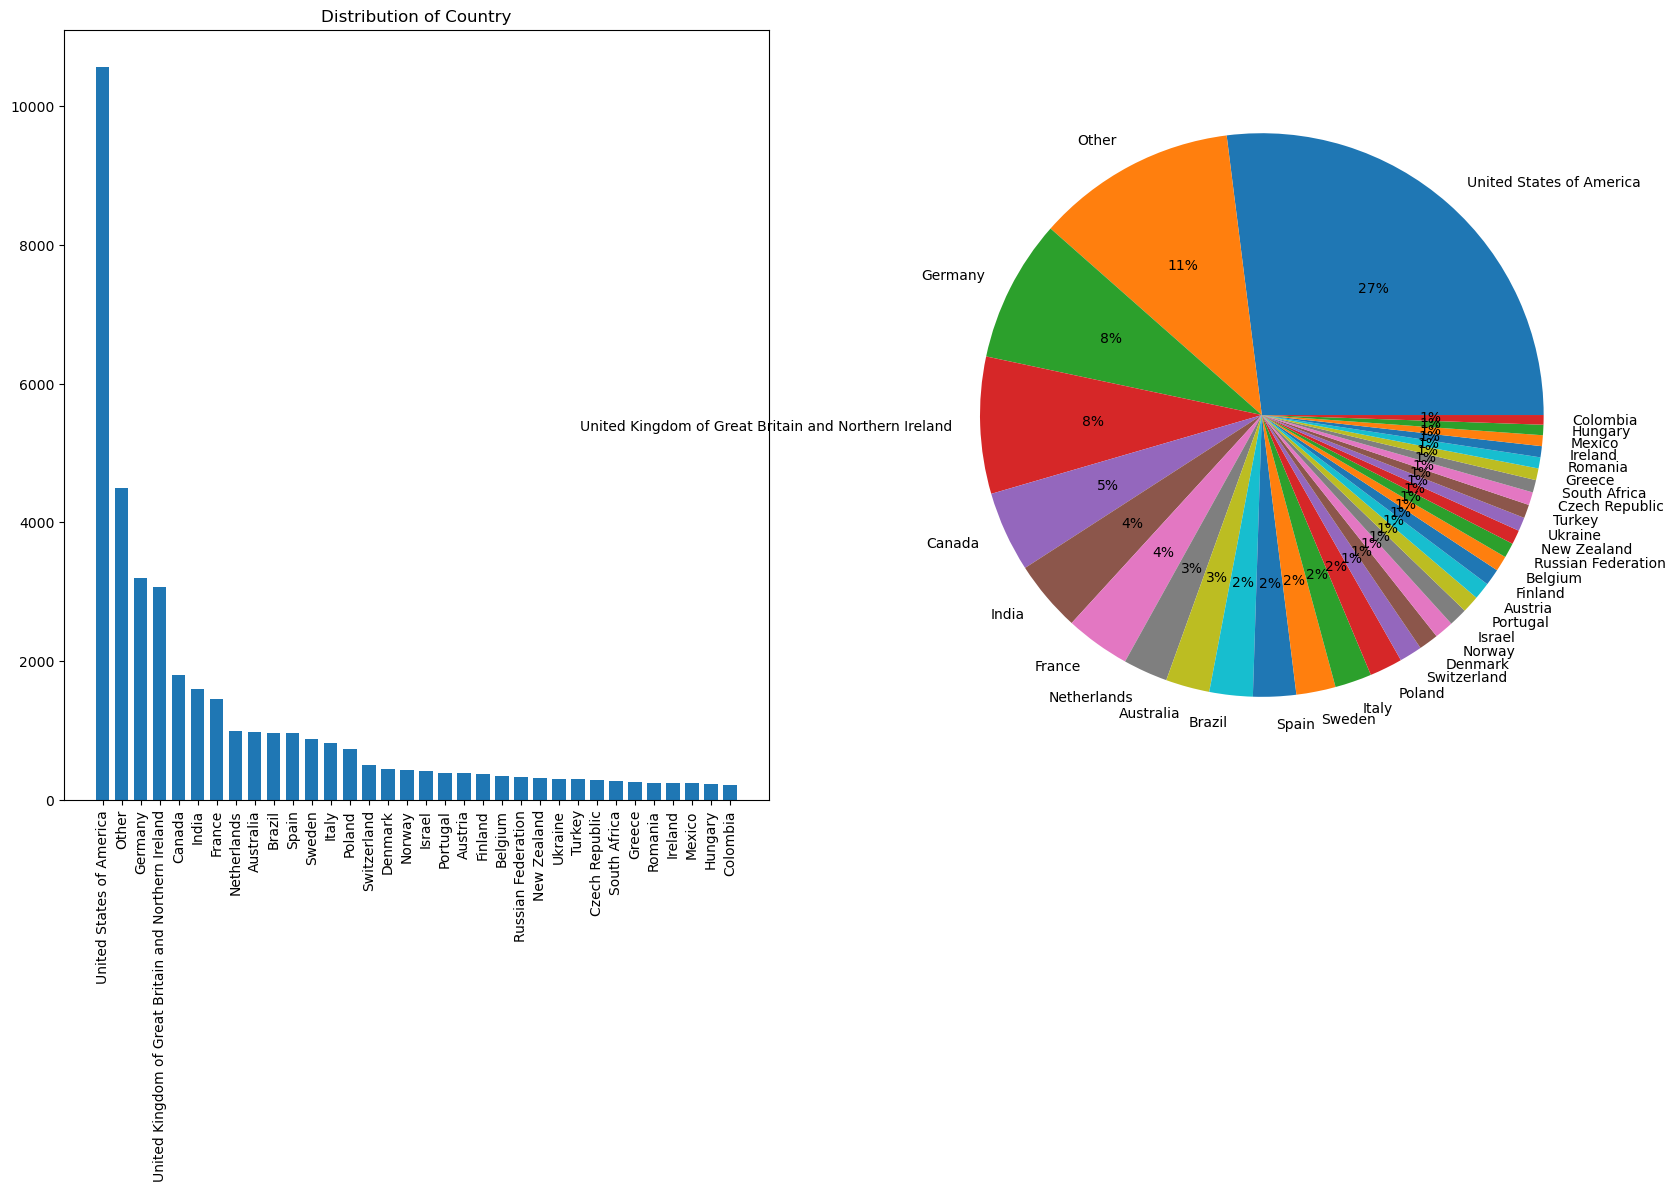

In [31]:
country = df["Country"].value_counts()

label = country.index
value = country.values

plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)
plt.bar(label, value, width=0.7)
plt.xticks(rotation=90)
plt.title('Distribution of Country')

plt.subplot(1,2,2)
plt.pie(x=value, labels=label, autopct='%.0f%%')

plt.show()

#### 2.7.5 Displaying Remote Work

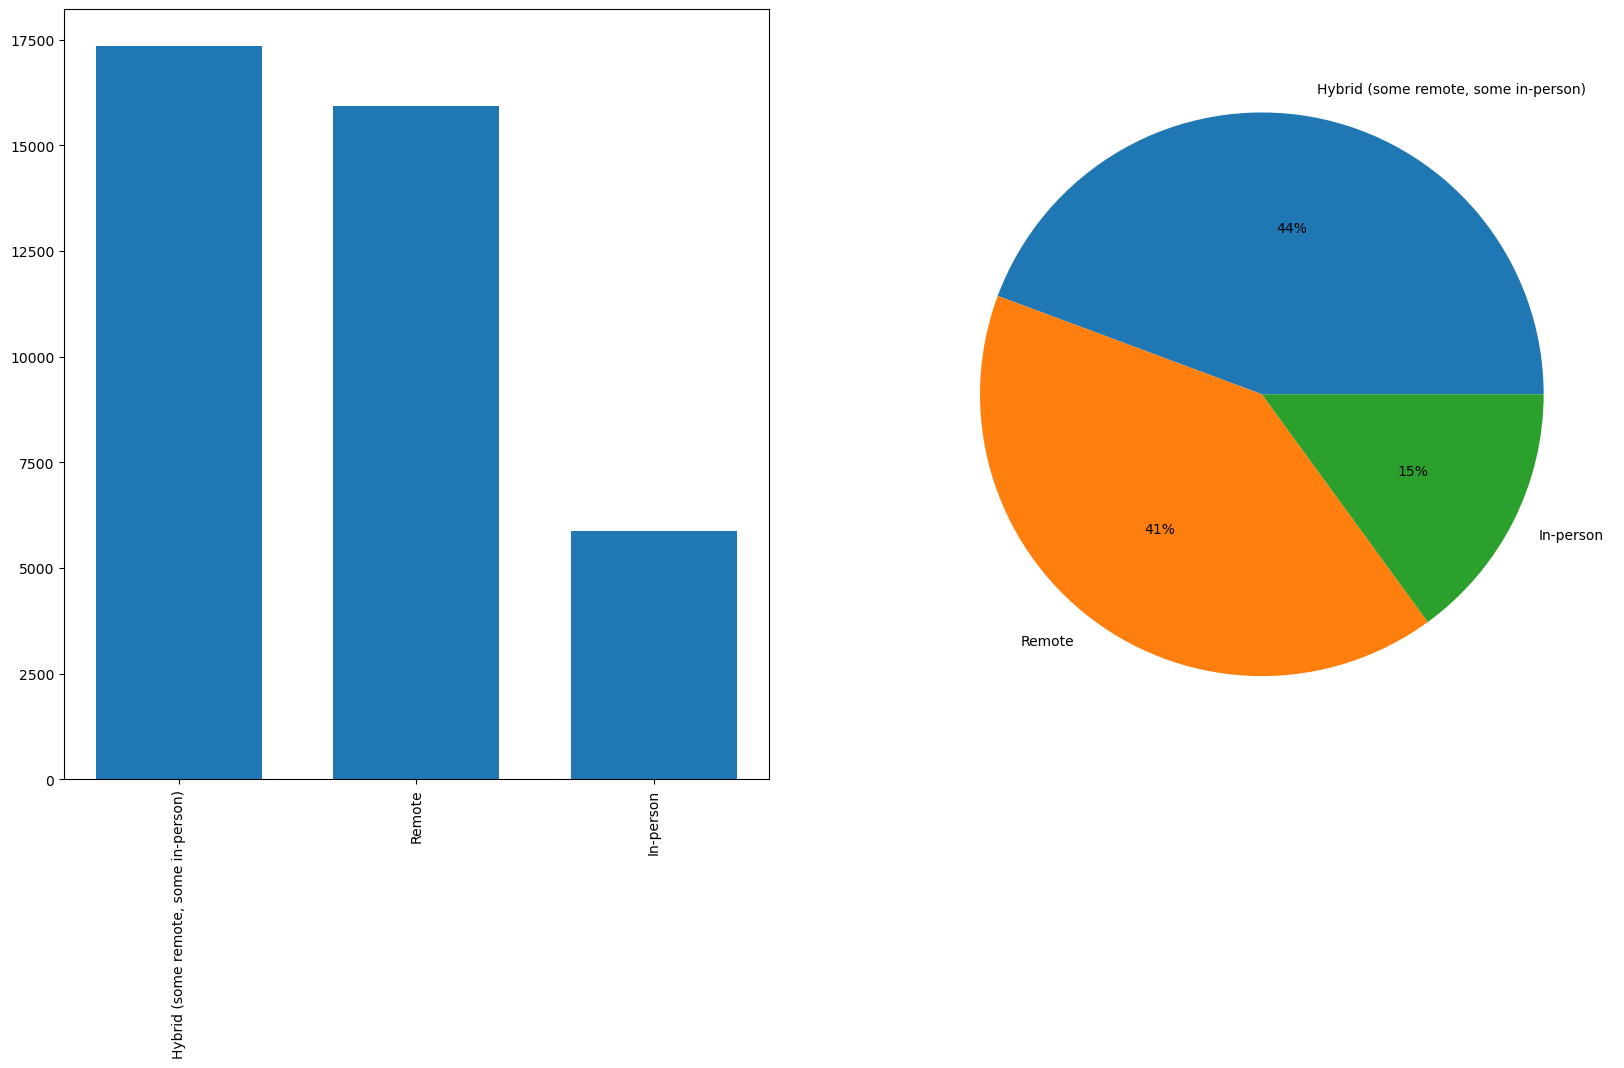

In [32]:
remote = df["RemoteWork"].value_counts()

label = remote.index
value = remote.values

plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)
plt.bar(label, value, width=0.7)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.pie(x=value, labels=label, autopct='%.0f%%')

plt.show()

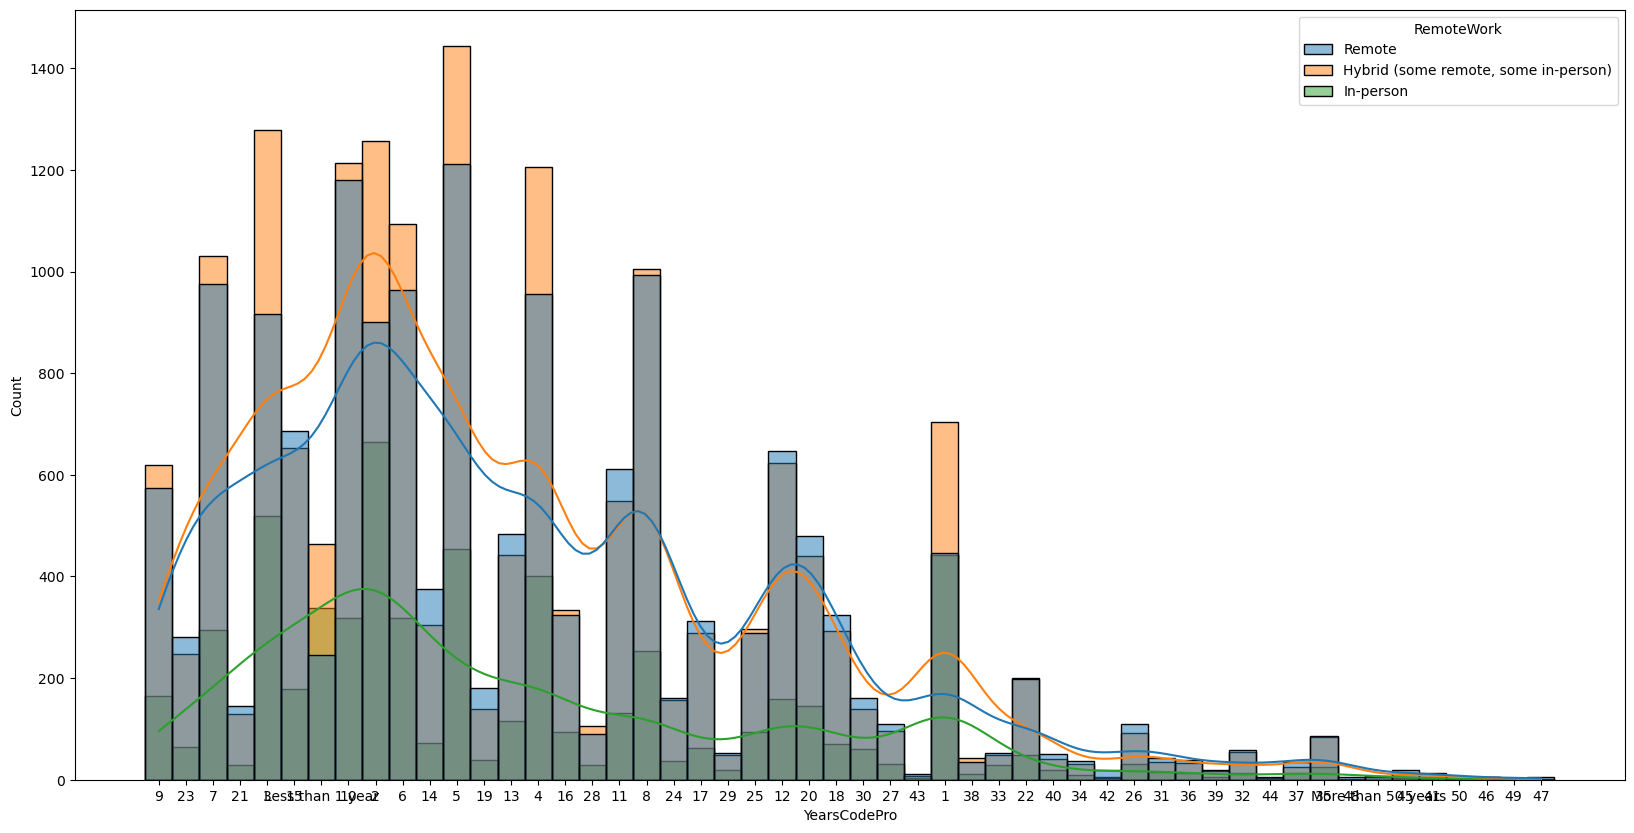

In [33]:
plt.figure(figsize=(20, 10))
sns.histplot(data=df, x="YearsCodePro", hue="RemoteWork", kde=True, bins=30)
plt.show()

#### 2.7.6 Salary

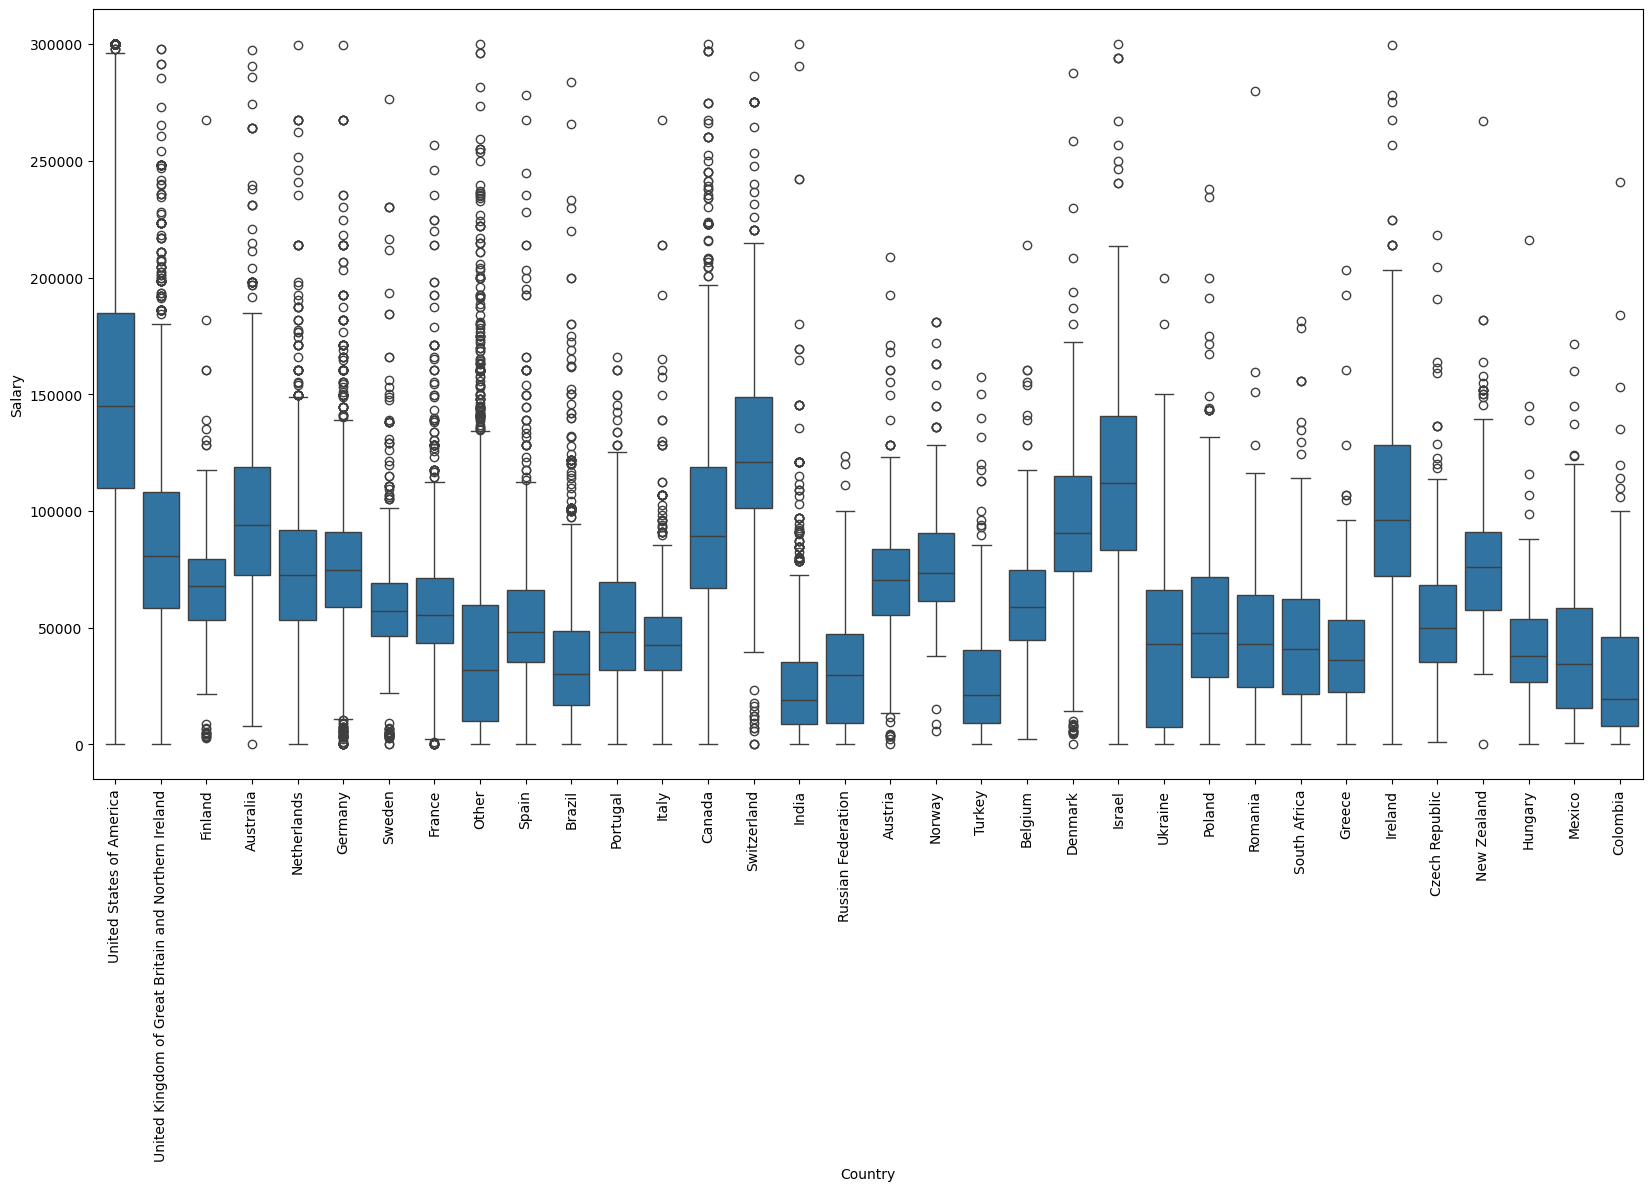

In [36]:
temp_df = df.copy()
temp_df = temp_df[temp_df["Salary"] <= 0.3*1e6]
plt.figure(figsize=(20, 10))
sns.boxplot(data=temp_df, x="Country", y="Salary")
plt.xticks(rotation=90)

plt.show()

> As we can see, there are so many outliers in the salary data for each country. Lets fix that by using `Capping Method`.

#### Capping Method:
The capping method based on the interquartile range, it address outliers in the salary data for each country. By doing this, it minimize the effect of extreme values by setting any salary below the 25th percentile to the value of the 25th percentile and any salary above the 75th percentile to the value of the 75th percentile.

BENEFITS:
- `Reduces Skewness:` This helps reduce the skewness of the data caused by extreme outliers, making statistical analysis more robust and representative of the typical data.
- `Improves Visualization:` It enhances the clarity of visual data representations by limiting the range of the data, which prevents extreme values from compressing the bulk of the data in visualizations like boxplots.
- `Standardizes Data by Country:` By adjusting based on country-specific percentiles, it takes into account the economic differences between countries, which is important when comparing salaries internationally.


https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code

#### Capping Method

In [37]:
data = df.groupby('Country')['Salary'].describe().reset_index()[['Country','25%','75%']]
data.head()

,Country,25%,75%
0,Australia,72714.0,118987.00
1,Austria,55472.0,84118.75
2,Belgium,44978.0,74963.00
3,Brazil,17042.0,48690.00
4,Canada,66916.0,118962.00


Calculate the 25th and 75th percentiles of salary within each country

In [38]:
df = df.merge(data, on = "Country", how ="left")
df.head()

,Country,Age,EdLevel,YearsCodePro,RemoteWork,Salary,25%,75%
0,United States of America,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,Remote,285000.0,110000.0,200000.0
1,United States of America,45-54 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,"Hybrid (some remote, some in-person)",250000.0,110000.0,200000.0
2,United States of America,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,"Hybrid (some remote, some in-person)",156000.0,110000.0,200000.0
3,United Kingdom of Great Britain and Northern I...,35-44 years old,Some college/university study without earning ...,21,Remote,96828.0,59586.0,111724.0
4,United States of America,35-44 years old,Some college/university study without earning ...,3,Remote,135000.0,110000.0,200000.0


Merge these percentiles back to the main dataframe

In [39]:
mask = df["Salary"]<df['25%']
df.loc[mask,"Salary"] = df["25%"]

mask = df["Salary"]>df['75%']
df.loc[mask,"Salary"] = df["75%"]

df

,Country,Age,EdLevel,YearsCodePro,RemoteWork,Salary,25%,75%
0,United States of America,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,Remote,200000.0,110000.0,200000.0
1,United States of America,45-54 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,"Hybrid (some remote, some in-person)",200000.0,110000.0,200000.0
2,United States of America,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,"Hybrid (some remote, some in-person)",156000.0,110000.0,200000.0
3,United Kingdom of Great Britain and Northern I...,35-44 years old,Some college/university study without earning ...,21,Remote,96828.0,59586.0,111724.0
4,United States of America,35-44 years old,Some college/university study without earning ...,3,Remote,135000.0,110000.0,200000.0
...,...,...,...,...,...,...,...,...
39150,Mexico,25-34 years old,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",5,"Hybrid (some remote, some in-person)",28625.0,15629.0,60056.0
39151,Brazil,35-44 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",24,Remote,48690.0,17042.0,48690.0
39152,India,18-24 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Remote,15752.0,8724.0,35139.0
39153,France,25-34 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",9,"Hybrid (some remote, some in-person)",64254.0,43907.0,71750.0


Capping the salaries at the 25th percentile;

Capping the salaries at the 75th percentile;

and Displaying the head of the modified DataFrame;

#### 2.7.7 Salary Without Outliers

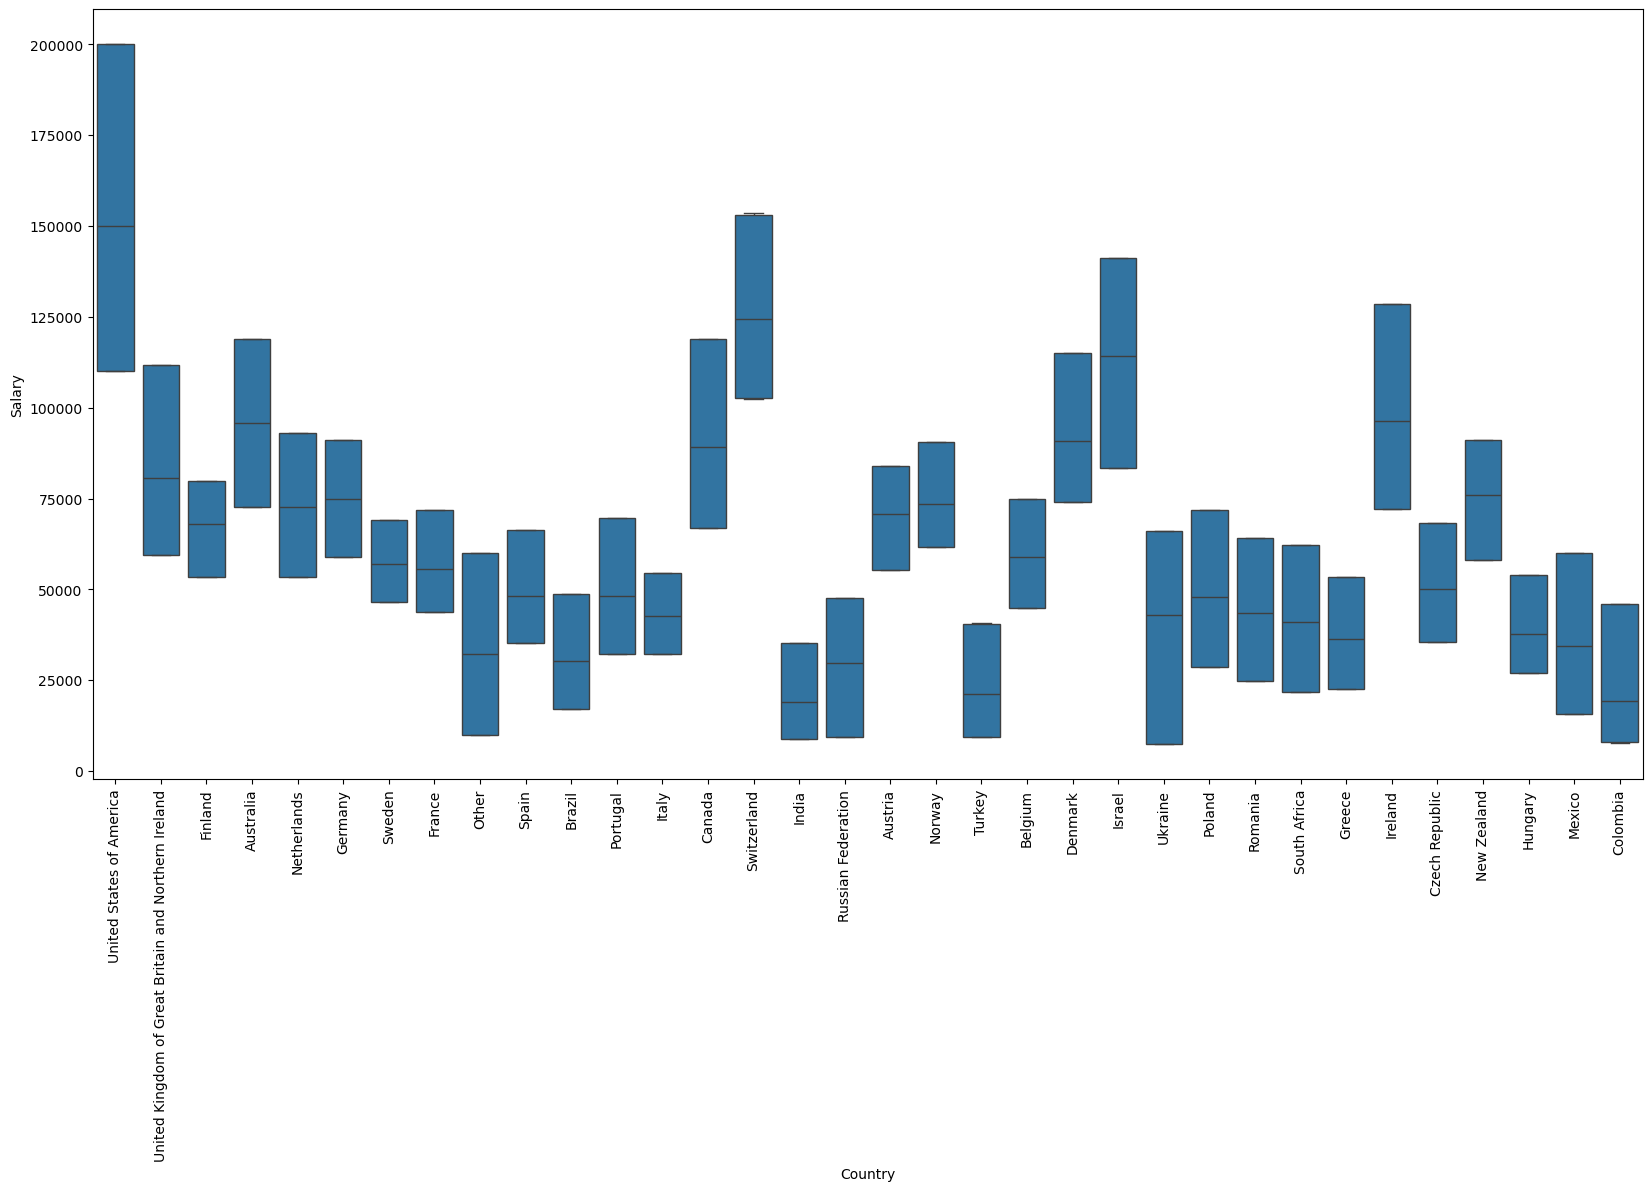

In [40]:
temp_df = df.copy()
temp_df = temp_df[temp_df["Salary"] <= 0.3*1e6]

plt.figure(figsize=(20, 10))
sns.boxplot(data=temp_df, x="Country", y="Salary")
plt.xticks(rotation=90)

plt.show()

#### 2.7.8 Salary by Country

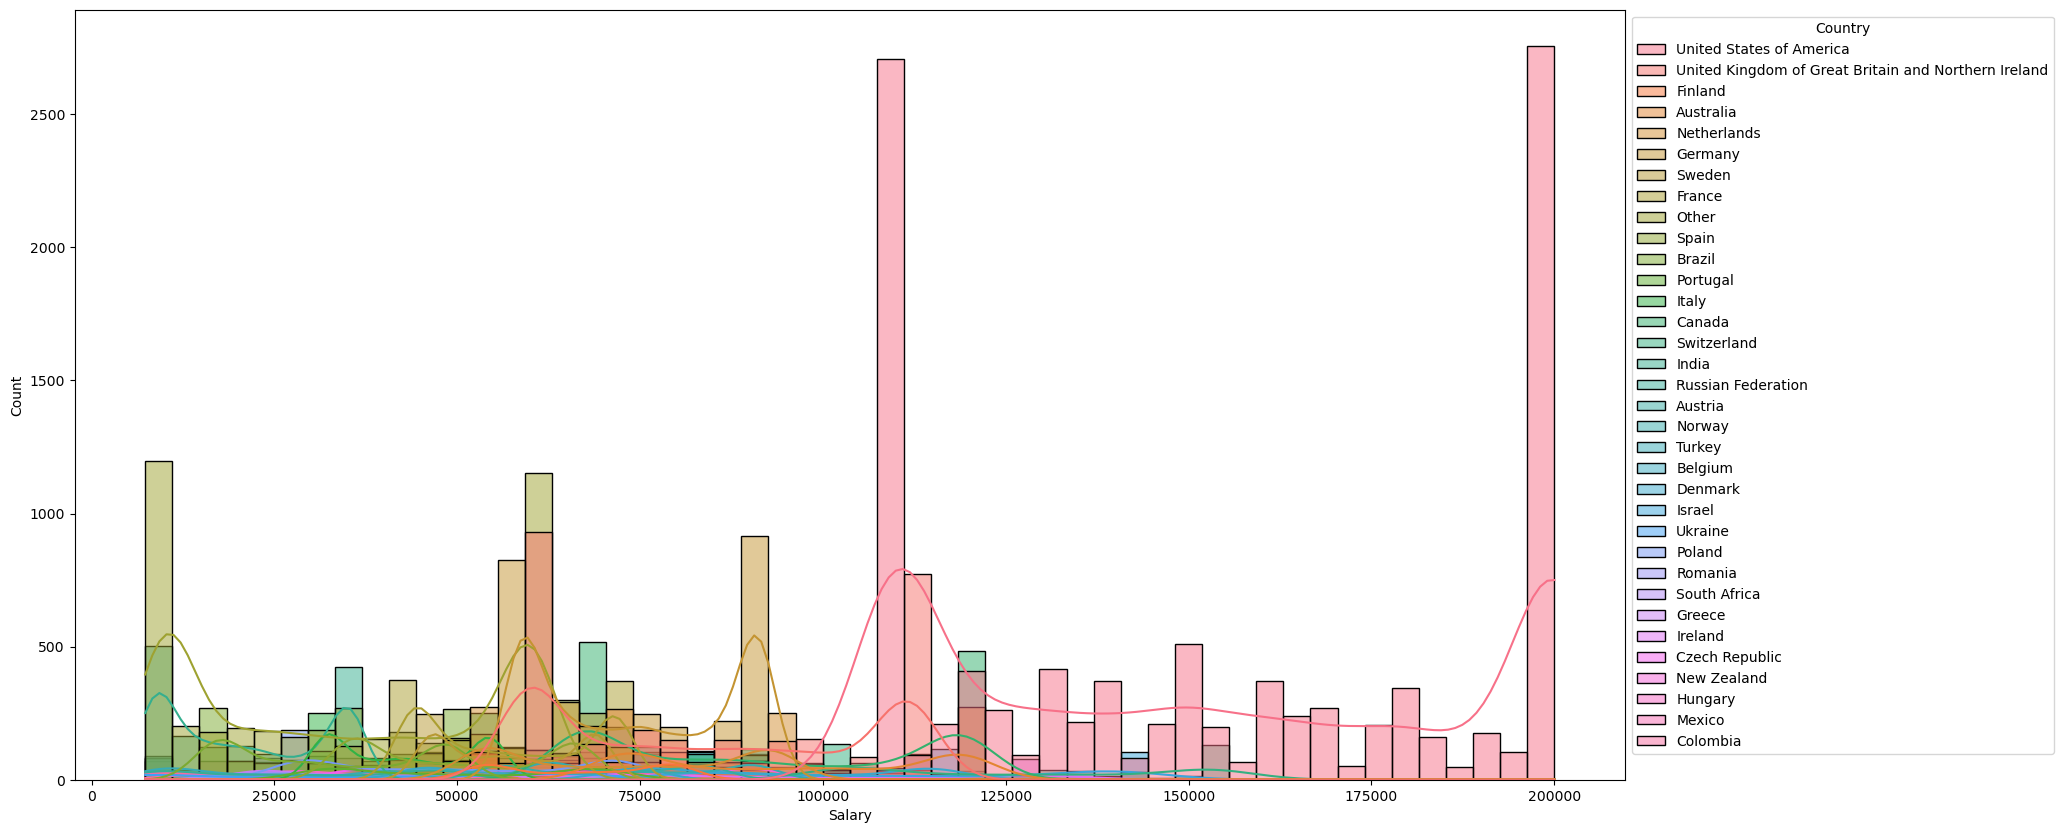

In [41]:
plt.figure(figsize=(20, 10))
ax = sns.histplot(data=df, x="Salary", hue="Country", kde=True)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.show()

#### 2.7.9 Salary by Age

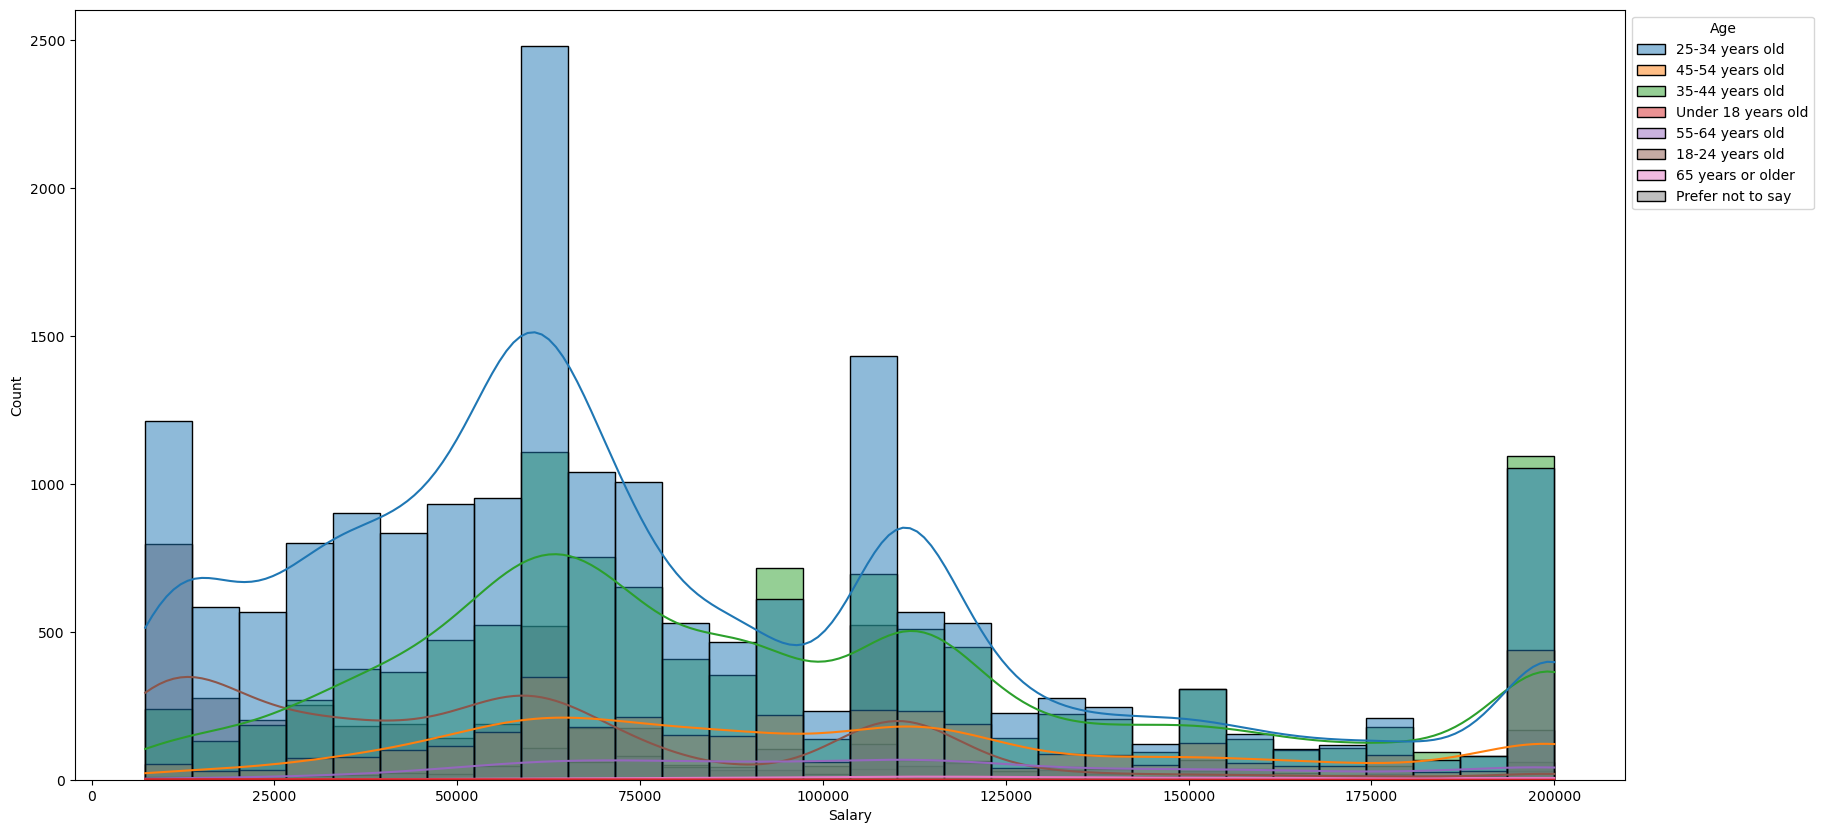

In [42]:
plt.figure(figsize=(20, 10))
ax = sns.histplot(data=df, x="Salary", hue="Age", kde=True, bins=30)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.show()

#### 2.7.10 Salary by Education Level

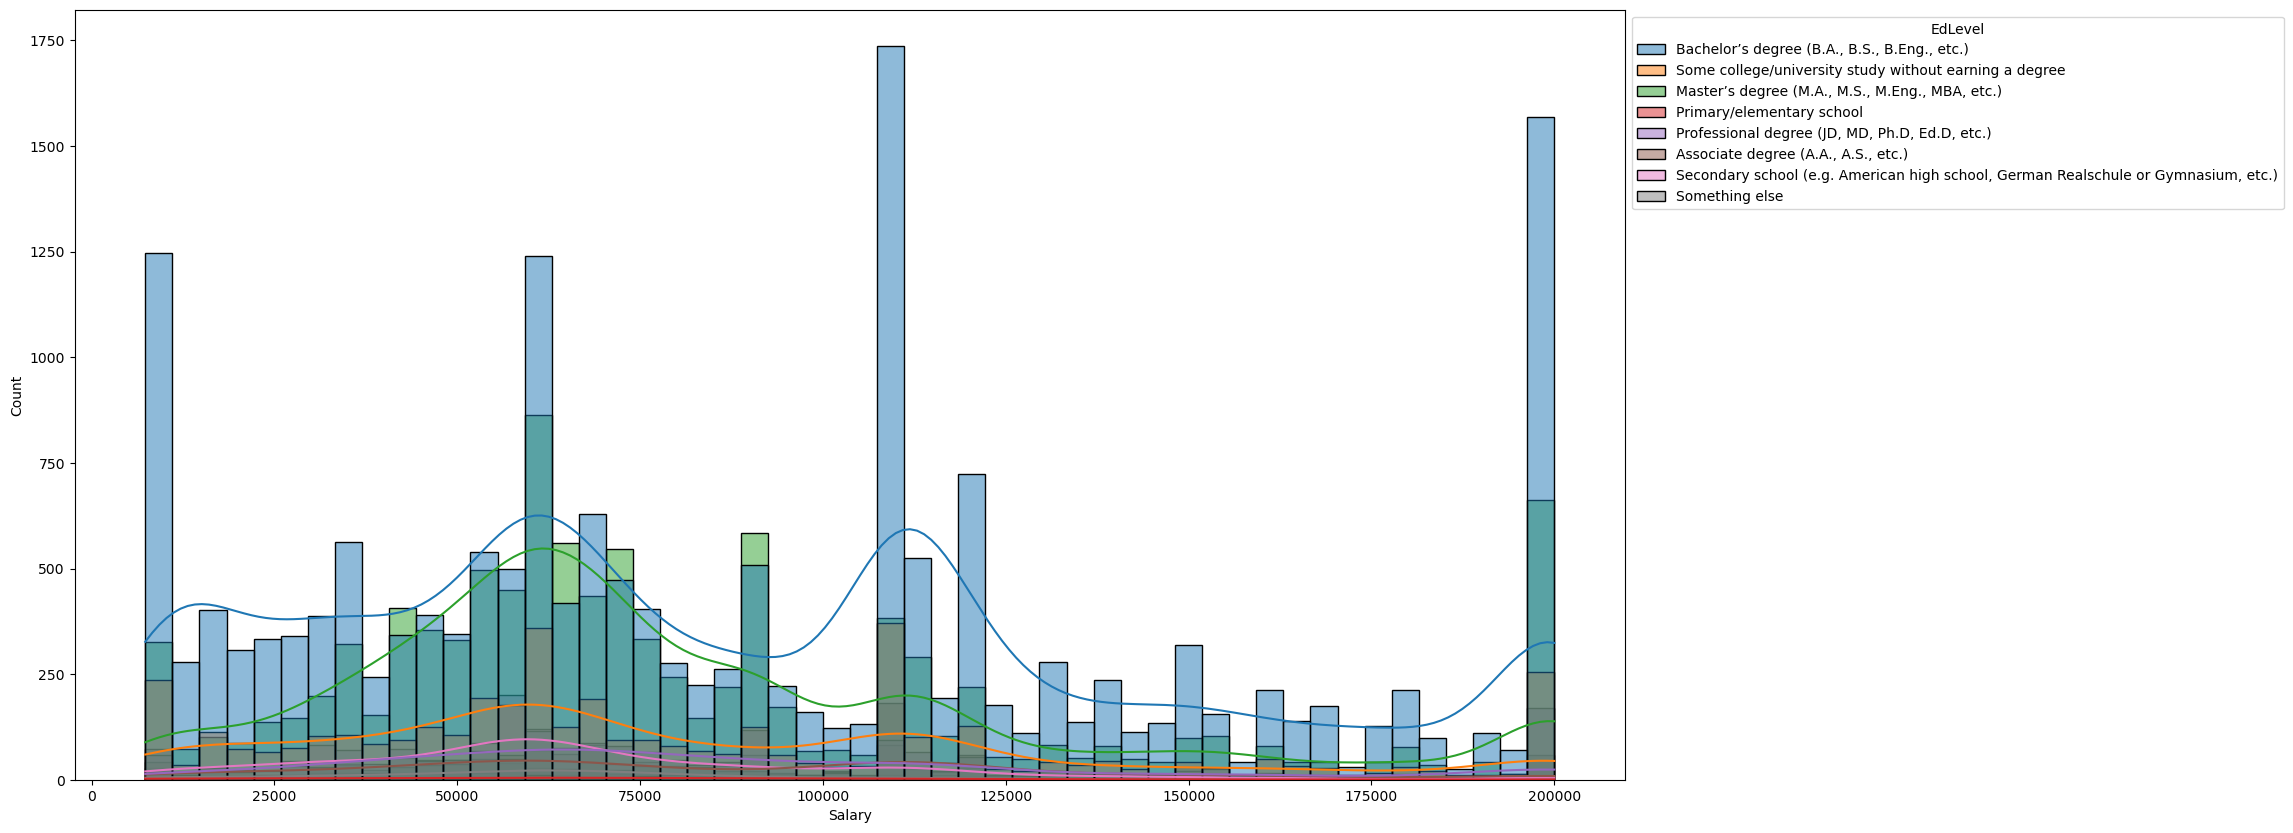

<Figure size 2000x1000 with 0 Axes>

In [43]:
plt.figure(figsize=(20, 10))
ax = sns.histplot(data=df, x="Salary", hue="EdLevel", kde=True)
plt.figure(figsize=(20, 10))
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.show()

#### 2.7.11 Salary by Hybrid, Remote and In Person

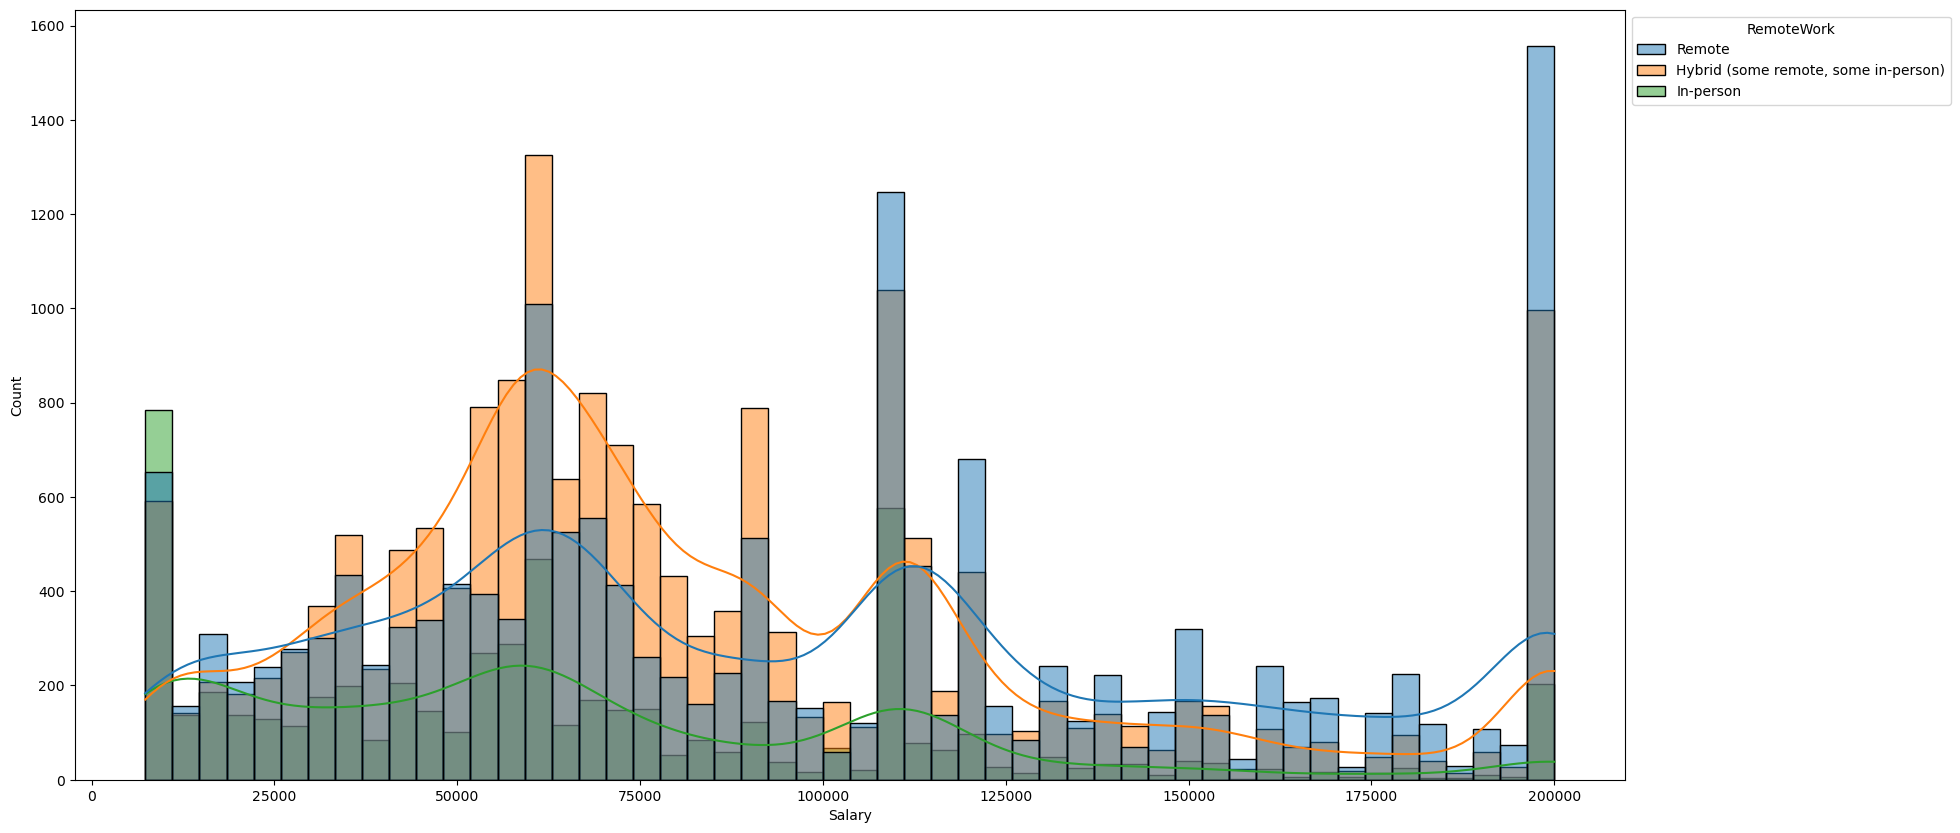

<Figure size 2000x1000 with 0 Axes>

In [44]:
plt.figure(figsize=(20, 10))
ax = sns.histplot(data=df, x="Salary", hue="RemoteWork", kde=True)
plt.figure(figsize=(20, 10))
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.show()

#### 2.7.12 Dropping Capping Method

In [45]:
df.drop(['25%','75%'],axis=1,inplace=True)

### 2.8 Handling "Age"

#### 2.8.1 Displaying Unique Values

In [46]:
df["Age"].unique()

array(['25-34 years old', '45-54 years old', '35-44 years old',
       'Under 18 years old', '55-64 years old', '18-24 years old',
       '65 years or older', 'Prefer not to say'], dtype=object)

#### 2.8.2 Clean Experience Function

In [47]:
def cleaned_age(x):
    if x == "45-54 years old":
        return 45
    if x == '25-34 years old':
        return 25
    if x == '35-44 years old':
        return 35
    if x == '55-64 years old':
        return 55
    if x == '18-24 years old':
        return 18
    if x == '65 years or older':
        return 65
    if x == 'Prefer not to say':
        return 0
    if x == 'Under 18 years old':
        return 17

df["Age"] = df["Age"].apply(cleaned_age)

df["Age"].value_counts()

Age
25    18633
35    11096
18     4128
45     3726
55     1340
65      186
17       27
0        19
Name: count, dtype: int64

#### 2.8.3 Remove 'Prefer not to say'

In [48]:
df = df[df["Age"]!= 0]

df["Age"].value_counts()

Age
25    18633
35    11096
18     4128
45     3726
55     1340
65      186
17       27
Name: count, dtype: int64

### 2.9 Handling "YearsCodePro"

#### 2.9.1 Displays Unique Values

In [49]:
df["YearsCodePro"].unique()

array(['9', '23', '7', '21', '3', '15', 'Less than 1 year', '10', '2',
       '6', '14', '5', '19', '13', '4', '16', '28', '11', '8', '24', '17',
       '29', '25', '12', '20', '18', '30', '27', '43', '1', '38', '33',
       '22', '40', '34', '42', '26', '31', '36', '39', '32', '44', '37',
       '35', '48', 'More than 50 years', '45', '41', '50', '46', '49',
       '47'], dtype=object)

#### 2.9.2 Clean Experience Function

In [50]:
def clean_experience(x):
    if x == 'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

df["YearsCodePro"] = df["YearsCodePro"].apply(clean_experience)

df["YearsCodePro"].unique()

/run/user/1000/app/org.jupyter.JupyterLab/ipykernel_386/857395925.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["YearsCodePro"] = df["YearsCodePro"].apply(clean_experience)


array([ 9. , 23. ,  7. , 21. ,  3. , 15. ,  0.5, 10. ,  2. ,  6. , 14. ,
        5. , 19. , 13. ,  4. , 16. , 28. , 11. ,  8. , 24. , 17. , 29. ,
       25. , 12. , 20. , 18. , 30. , 27. , 43. ,  1. , 38. , 33. , 22. ,
       40. , 34. , 42. , 26. , 31. , 36. , 39. , 32. , 44. , 37. , 35. ,
       48. , 50. , 45. , 41. , 46. , 49. , 47. ])

### 2.10 Handling "EdLevel"

#### 2.10.1 Displays Uniques Values

In [51]:
df["EdLevel"].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Primary/elementary school',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Something else'], dtype=object)

#### 2.10.2 Clean Education Function

In [52]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clean_education)

df["EdLevel"].unique()

/run/user/1000/app/org.jupyter.JupyterLab/ipykernel_386/3250403368.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EdLevel'] = df['EdLevel'].apply(clean_education)


array(['Bachelor’s degree', 'Less than a Bachelors', 'Master’s degree',
       'Post grad'], dtype=object)

### 2.11 Handling "RemoteWork"

In [53]:
df["RemoteWork"].unique()

array(['Remote', 'Hybrid (some remote, some in-person)', 'In-person'],
      dtype=object)

## 3. Model Development Setup

### 3.1 LabelEncoder

Using LabelEncoder to convert string to float: `'United States of America'`, if not using LabelEncoder, there will be a error because this dataset contains categorical or non-numeric data that the MinMaxScaler cannot process. The scaler expects all features to be numeric since it operates by scaling each feature to a given range, typically [0, 1].

These Categorical variables like `"EdLevel"`, `"Country"`, and `"RemoteWork"` are converted into numeric format using LabelEncoder. This is necessary because most machine learning algorithms require numerical input.

In [54]:
from sklearn.preprocessing import LabelEncoder

le_education = LabelEncoder()
df["EdLevel"] = le_education.fit_transform(df["EdLevel"])

le_country = LabelEncoder()
df["Country"] = le_country.fit_transform(df["Country"])

le_remote = LabelEncoder()
df["RemoteWork"] = le_remote.fit_transform(df["RemoteWork"])

/run/user/1000/app/org.jupyter.JupyterLab/ipykernel_386/2592914109.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["EdLevel"] = le_education.fit_transform(df["EdLevel"])
/run/user/1000/app/org.jupyter.JupyterLab/ipykernel_386/2592914109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Country"] = le_country.fit_transform(df["Country"])
/run/user/1000/app/org.jupyter.JupyterLab/ipykernel_386/2592914109.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

### 3.2 Splitting the Feature and Target Columns Salary

The features `(X)` and the target variable `(y, which is "Salary")` are separated.

In [55]:
X = df.iloc[:,:-1]
y = df["Salary"]

### 3.3 Scaling the data and splitting train and test data

`Data Scaling:` The features are scaled using MinMaxScaler. This normalization ensures that no single feature will disproportionately impact the model due to its scale.

`Data Splitting:` The data is split into training sets (70%) and testing sets (30%) using train_test_split. This allows the models to be trained on one set of data and tested on an unseen set to evaluate their generalization capabilities.

In [56]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

mm = MinMaxScaler()
X = mm.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)